In [3]:
###power_calculation###

import numpy as np
from scipy.stats import norm
import mne
import numpy as np
import scipy.io
import scipy.signal as ss
from scipy import stats
#import pyedflib
from scipy.signal import hilbert,butter, lfilter,welch
from scipy.integrate import simps
from mne.time_frequency import psd_array_multitaper
def myBandPower(data, sampling_rate, 
                frequency_band1,frequency_band2,frequency_band3,frequency_band4,frequency_band5,frequency_band6,
                method='welch', window_sec=None):
    
    frequency_band1 = np.asarray(frequency_band1)
    frequency_band2 = np.asarray(frequency_band2)
    frequency_band3 = np.asarray(frequency_band3)
    frequency_band4 = np.asarray(frequency_band4)
    frequency_band5 = np.asarray(frequency_band5)
    frequency_band6 = np.asarray(frequency_band6)

    
    low_limitation1, high_limitation1 = frequency_band1
    low_limitation2, high_limitation2 = frequency_band2
    low_limitation3, high_limitation3 = frequency_band3
    low_limitation4, high_limitation4 = frequency_band4
    low_limitation5, high_limitation5 = frequency_band5
    low_limitation6, high_limitation6 = frequency_band6
    
    # Compute the modified periodogram (Welch)
    if method == 'welch':
        if window_sec is not None:
            num_of_sample_per_segment = window_sec * sampling_rate
        else:
            num_of_sample_per_segment = (2 / low_limitation) * sampling_rate
        freqs, psd = welch(data, sampling_rate, nperseg=num_of_sample_per_segment)
    elif method == 'multitaper':
        psd, freqs = psd_array_multitaper(data, sampling_rate, adaptive=True,
                                          normalization='full', verbose=0)
    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find index of band in frequency vector
    idx_band1 = np.logical_and(freqs >= low_limitation1, freqs <= high_limitation1)
    idx_band2 = np.logical_and(freqs >= low_limitation2, freqs <= high_limitation2)
    idx_band3 = np.logical_and(freqs >= low_limitation3, freqs <= high_limitation3)
    idx_band4 = np.logical_and(freqs >= low_limitation4, freqs <= high_limitation4)
    idx_band5 = np.logical_and(freqs >= low_limitation5, freqs <= high_limitation5)
    idx_band6 = np.logical_and(freqs >= low_limitation6, freqs <= high_limitation6)
   
    # Integral approximation of the spectrum using parabola (Simpson's rule)
    bp1 = simps(psd[idx_band1], dx=freq_res)
    bp2 = simps(psd[idx_band2], dx=freq_res)
    bp3 = simps(psd[idx_band3], dx=freq_res)
    bp4 = simps(psd[idx_band4], dx=freq_res)
    bp5 = simps(psd[idx_band5], dx=freq_res)
    bp6 = simps(psd[idx_band6], dx=freq_res)
    
    bp=[bp1,bp2,bp3,bp4,bp5,bp6]       
    return bp

In [4]:
###power_calculation###

num_subject=np.array([1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31,
                      32,35,36,37,38,39,40,41,42,43])
for i in range(len(num_subject)):
    data= np.load('subject'+str(num_subject[i])+'_clean.npy')
    band_power_all_band=np.zeros((21,6))
    for ii in range (21):
        band_power_all_band[ii] = myBandPower(data[ii,:], 250 , [4, 8],
                                        [8, 12],[12, 25], [25, 30],[30, 40],[40, 49],'multitaper')
    #  theta, alpha,  beta,    h_beta,  gamma,   h_gamma
    #[4, 8],[8, 12],[12, 25],[25, 30],[30, 40],[40, 49]
    np.save('eeg_data_'+str(num_subject[i])+'_band_power_paper', band_power_all_band)

<ipython-input-3-5d1286c996d2>:41: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(data, sampling_rate, adaptive=True,
<ipython-input-3-5d1286c996d2>:41: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(data, sampling_rate, adaptive=True,
<ipython-input-3-5d1286c996d2>:41: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(data, sampling_rate, adaptive=True,
<ipython-input-3-5d1286c996d2>:41: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(data, sampling_rate, adaptive=True,
<ipython-input-3-5d1286c996d2>:41: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(data, sampling_rate, adaptive=True,
<ipython-input-3-5d1286c996d2>:41: RuntimeWarning: Iterative multi-taper PSD computation did not converge

In [5]:
###phase_lag_calculation###

import numpy as np
from scipy.signal import hilbert,butter, lfilter,welch
def butterBandpass(data, lower_limit_filter, upper_limit_filter, sampling_rate, order=4):
    """
    This func is for filtering signal between lower and upper bounds
    the methods are used from scipy.signal lib
    """
    nyquist_coeff = 0.5 * sampling_rate
    low_frequences_filter = lower_limit_filter / nyquist_coeff
    high_frequences_filter = upper_limit_filter / nyquist_coeff
    numerator_filter, denominator_filter = butter(order, 
                                                  [low_frequences_filter, high_frequences_filter],
                                                  btype='band')

    # based on numinator and denominator the filter signal ...                                            
    filtered_signal = lfilter(numerator_filter, denominator_filter, data)
    return filtered_signal

In [9]:
###phase_lag_calculation###

for i in range(len(num_subject)):
    data= np.load('subject'+str(num_subject[i])+'_clean.npy')     
    
    filter_signal_theta = butterBandpass(data, 4, 8, 250)
    filter_signal_alpha = butterBandpass(data, 8, 12, 250)
    filter_signal_beta = butterBandpass(data, 12, 25, 250)
    filter_signal_h_beta = butterBandpass(data, 25, 30, 250)
    filter_signal_gamma = butterBandpass(data, 30, 40, 250)
    filter_signal_h_gamma = butterBandpass(data, 40, 49, 250)

    phase_diff_theta=np.zeros((21,21))
    phase_diff_alpha=np.zeros((21,21))
    phase_diff_beta=np.zeros((21,21))
    phase_diff_h_beta=np.zeros((21,21))
    phase_diff_gamma=np.zeros((21,21))
    phase_diff_hgamma=np.zeros((21,21))
    
    for jj in range (21):
        for j in range (21):
       
            ch1_theta=filter_signal_theta[jj,:]
            ch2_theta=filter_signal_theta[j,:] 
            x1_theta= hilbert(ch1_theta)
            x2_theta = hilbert(ch2_theta)
            c_theta = np.inner( x1_theta, np.conj(x2_theta) )/np.sqrt( np.inner(x1_theta,np.conj(x1_theta)) * np.inner(x2_theta,np.conj(x2_theta)))
            phase_diff_theta[jj,j]= np.angle(c_theta)
       
            ch1_alpha=filter_signal_alpha[jj,:]
            ch2_alpha=filter_signal_alpha[j,:] 
            x1_alpha= hilbert(ch1_alpha)
            x2_alpha = hilbert(ch2_alpha)
            c_alpha = np.inner( x1_alpha, np.conj(x2_alpha) )/np.sqrt( np.inner(x1_alpha,np.conj(x1_alpha)) * np.inner(x2_alpha,np.conj(x2_alpha)))
            phase_diff_alpha[jj,j]= np.angle(c_alpha)
        
            ch1_beta=filter_signal_beta[jj,:]
            ch2_beta=filter_signal_beta[j,:] 
            x1_beta= hilbert(ch1_beta)
            x2_beta = hilbert(ch2_beta)
            c_beta= np.inner( x1_beta, np.conj(x2_beta) )/np.sqrt( np.inner(x1_beta,np.conj(x1_beta)) * np.inner(x2_beta,np.conj(x2_beta)))
            phase_diff_beta[jj,j]= np.angle(c_beta)
       
       
            ch1_h_beta=filter_signal_h_beta[jj,:]
            ch2_h_beta=filter_signal_h_beta[j,:] 
            x1_h_beta= hilbert(ch1_h_beta)
            x2_h_beta = hilbert(ch2_h_beta)
            c_h_beta = np.inner( x1_h_beta, np.conj(x2_h_beta) )/np.sqrt( np.inner(x1_h_beta,np.conj(x1_h_beta)) * np.inner(x2_h_beta,np.conj(x2_h_beta)))
            phase_diff_h_beta[jj,j]= np.angle(c_h_beta)
       
            ch1_gamma=filter_signal_gamma[jj,:]
            ch2_gamma=filter_signal_gamma[j,:] 
            x1_gamma= hilbert(ch1_gamma)
            x2_gamma = hilbert(ch2_gamma)
            c_gamma = np.inner( x1_gamma,np.conj(x2_gamma) )/np.sqrt( np.inner(x1_gamma,np.conj(x1_gamma)) * np.inner(x2_gamma,np.conj(x2_gamma)))
            phase_diff_gamma[jj,j]= np.angle(c_gamma)
       
            ch1_hgamma=filter_signal_h_gamma[jj,:]
            ch2_hgamma=filter_signal_h_gamma[j,:] 
            x1_hgamma= hilbert(ch1_hgamma)
            x2_hgamma = hilbert(ch2_hgamma)
            c_hgamma = np.inner( x1_hgamma, np.conj(x2_hgamma) )/np.sqrt( np.inner(x1_hgamma,np.conj(x1_hgamma)) * np.inner(x2_hgamma,np.conj(x2_hgamma)))
            phase_diff_hgamma[jj,j]= np.angle(c_hgamma)
       
    phase_diff_all_band=[phase_diff_theta,phase_diff_alpha,phase_diff_beta,phase_diff_h_beta,
                             phase_diff_gamma,phase_diff_hgamma]                                                         
    np.save('eeg_data_'+str(num_subject[i])+'_phase_diff_paper', phase_diff_all_band) 

In [10]:
###power_calculation###
import numpy as np
from scipy import stats
from scipy.stats import norm
num_subject=np.array([1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31,
                      32,35,36,37,38,39,40,41,42,43])    
power=np.empty((0,(21*6)))

for i in range(len(num_subject)):
    cc=np.load('eeg_data_'+str(num_subject[i])+'_band_power_paper.npy')
    cc_del=cc.reshape((1,(21*6)))
    power=np.append(power,cc_del,axis=0) 
    
z_power=np.empty(power.shape)
for ii in range(z_power.shape[1]):
    z_power[:,ii]=stats.zscore(power[:,ii])
    
for i in range(z_power.shape[1]):
    anomaly_index=[]
    for j in range(z_power.shape[0]):
        if z_power[j,i] >3.5 or z_power[j,i]<-3.5:
                anomaly_index=np.append(anomaly_index,i)
    if len(anomaly_index)>10:
        z_power=np.delete(z_power,i,1)      
        

In [11]:
##gathering power features of all subjects in one file
phase=np.empty((len(num_subject),2646))
for i in range(len(num_subject)):
    cc=np.load('eeg_data_'+str(num_subject[i])+'_phase_diff_paper.npy')
    ph=cc.reshape(1,2646)
    phase[i,:]=ph

In [20]:
EF=np.array([5,4,3.5,1.7,2,3.5,3.5,4.5,4.8,3.5,3.1,4,2.6,2.6,2.8,4.6,4.2,2.7,3.7,3.9,4.2,4,4,
                             4.7,3.8,3.6,5,2.4,3,4,2.8,2.1,3.5,4,4,4.9,1,1])
IC=np.array([1.6,5,2.7,4.5,1,1.4,2,3.9,4.4,4.5,2.8,5,3.8,1.7,1.6,3.9,4.5,4.1,3.1,4.4,3,2.9,2.6,
                             3.5,2,1.4,2.7,1,4,3,4,2,0.5,5,4,4.1,1,1])

In [42]:
score=EF
feature= z_power
vv=np.empty((feature.shape[1]))
rr=np.empty((feature.shape[1]))
for ii in range((feature.shape[1])):
    #h1=scipy.stats.mstats.spearmanr(score,feature[:,ii]) 
    h1=scipy.stats.pearsonr(score,feature[:,ii])  
    vv[ii]=h1[0]
    rr[ii]=h1[1]

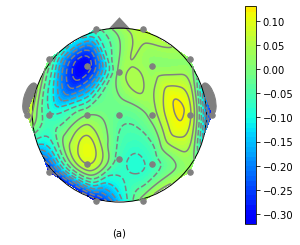

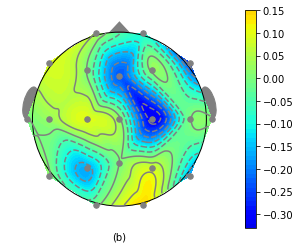

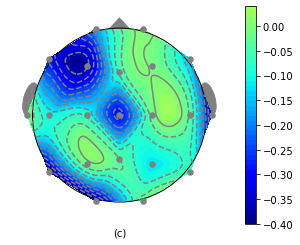

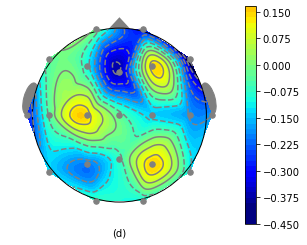

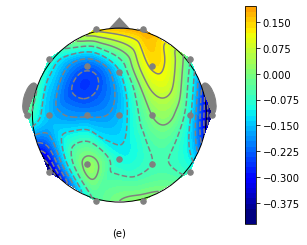

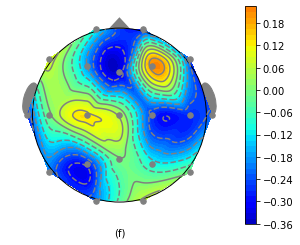

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
rhytm=np.asarray(('Theta','Alpha','Beta','High_Beta','Gamma','High_Gamma'))
number=np.asarray(('a','b','c','d','e','f'))
address=np.asarray(([-22,79],[22,79],[-30,45],[30,45],[-30,0],[30,0],[30,-45],[-30,-45],[-22,-79],[22,-79],[-65,52],
[65,52],[-65,0],[65,0],[-65,-52],[65,-52],[0,0],[0,40],[0,-40],[-85,0],[85,0]))

koord = address
N = 1000  # number of points for interpolation
xy_center = [0,0]   # center of the plot
radius = 90         # radius
  
for kk in range(6):
    nn=vv[kk*21:(kk+1)*21]
    #plt.close("all") # close old plots
    koord = address
    x,y = [],[]
    for i in koord:
        x.append(i[0])
        y.append(i[1])
    z = nn
    xi = np.linspace(-100, 100, N)
    yi = np.linspace(-100, 100, N)
    zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

# set points > radius to not-a-number. They will not be plotted.
# the dr/2 makes the edges a bit smoother
    dr = xi[1] - xi[0]
    for i in range(N):
        for j in range(N):
            r = np.sqrt((xi[i] - xy_center[0])**2 + (yi[j] - xy_center[1])**2)
            if (r - dr/2) > radius:
                zi[j,i] = "nan"

   # make figure
    fig = plt.figure()
    
    ax = fig.add_subplot(111, aspect = 1)
    CS = ax.contourf(xi, yi, zi, 50, cmap = plt.cm.jet, vmin=-0.4, vmax=0.4,zorder = 1)
    ax.contour(xi, yi, zi, 10, colors = "grey", zorder = 2)
    # make a color bar
    cbar = fig.colorbar(CS, ax=ax)
    ax.scatter(x, y, marker='o', c="grey", s=30, zorder=3)
    circle = matplotlib.patches.Circle(xy = xy_center, radius = 80, edgecolor = "k", facecolor = "none")
    ax.add_patch(circle)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('('+number[kk]+')')

    for loc, spine in ax.spines.items():
        spine.set_linewidth(0)
    circle = matplotlib.patches.Ellipse(xy = [82,15], width = 12, height = 30, angle = 15, edgecolor = "grey", facecolor = "grey", zorder = 0)
    ax.add_patch(circle)
    circle = matplotlib.patches.Ellipse(xy = [-82,15], width = 12, height = 30, angle = -15, edgecolor = "grey", facecolor = "grey", zorder = 0)
    ax.add_patch(circle)
        # add a nose
    xy = [[-13,76], [0,90],[13,76]]
    polygon = matplotlib.patches.Polygon(xy = xy, facecolor = "grey", zorder = 0)
    ax.add_patch(polygon) 
    #plt.title('  Inhibition Control,Power,'+rhytm[kk]+',Band')
    #plt.show() 
    plt.savefig('ghEF_'+rhytm[kk]+'_Band.png')

In [39]:
score=IC
feature= phase
vvv=np.empty((feature.shape[1]))
rr=np.empty((feature.shape[1]))
for ii in range((feature.shape[1])):
    #h1=scipy.stats.mstats.spearmanr(score,feature[:,ii]) 
    h1=scipy.stats.pearsonr(score,feature[:,ii])  
    vvv[ii]=h1[0]
    rr[ii]=h1[1]

In [40]:
gg=vvv.reshape(6,21,21)

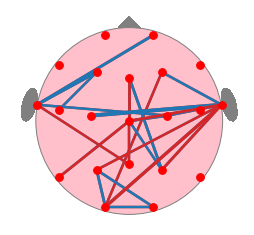

<Figure size 432x288 with 0 Axes>

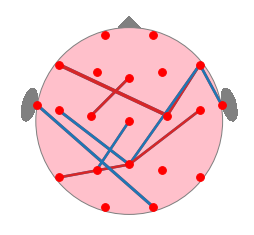

<Figure size 432x288 with 0 Axes>

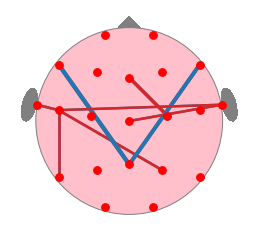

<Figure size 432x288 with 0 Axes>

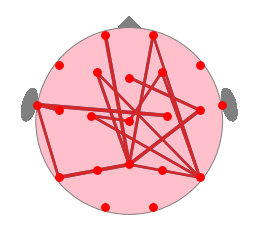

<Figure size 432x288 with 0 Axes>

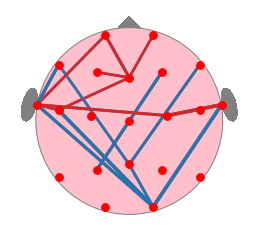

<Figure size 432x288 with 0 Axes>

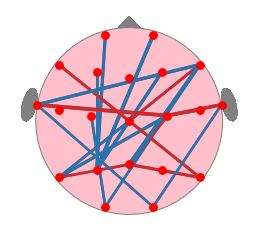

<Figure size 432x288 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
for jk in range(6):
    vvvv=gg[jk,:,:]
#['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','T3','T4','T5', 'T6','Cz','Fz','Pz','A2','A1'])
    address=np.asarray(([-22,79],[22,79],[-30,45],[30,45],[-35,5],[35,5],[30,-45],[-30,-45],[-22,-79],[22,-79],[-65,52],
    [65,52],[-65,10],[65,10],[-65,-52],[65,-52],[0,0],[0,40],[0,-40],[-85,15],[85,15]))
    koord = address
    N = 1000  # number of points for interpolation
    xy_center = [0,0]   # center of the plot
    radius = 90         # radius
  
    #plt.close("all") # close old plots
    koord = address
    x,y = [],[]
    for i in koord:
        x.append(i[0])
        y.append(i[1])
    xi = np.linspace(-100, 100, N)
    yi = np.linspace(-100, 100, N)
# set points > radius to not-a-number. They will not be plotted.
# the dr/2 makes the edges a bit smoother
    dr = xi[1] - xi[0]
   # make figure
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect = 1)
    ax.scatter(x, y, marker='o', c="red", s=60, zorder=3)
    circle = matplotlib.patches.Circle(xy = xy_center, radius = 86, edgecolor = "grey",facecolor = "pink")
    ax.add_patch(circle)
    ax.set_xticks([])
    ax.set_yticks([])

    for loc, spine in ax.spines.items():
        spine.set_linewidth(0)
    lw=0
    col=()
    for i in range(21):
        for j in range(21):
            weight=vvvv[i][j]
            if weight >= 0.3:
                lw=abs(weight*8)
                col='tab:blue'
            elif -0.3 <weight <0.3:
                lw=0
                col='tab:grey'
            elif weight <= -0.3:
                 lw=abs(weight*8)
                 col='tab:red'
            plt.plot((x[i],x[j]), (y[i],y[j]),col,linewidth=lw)
        # add two ears
            circle = matplotlib.patches.Ellipse(xy = [92,15], width = 12, height = 30, angle = 15, edgecolor = "grey", facecolor = "grey", zorder = 0)
            ax.add_patch(circle)
            circle = matplotlib.patches.Ellipse(xy = [-92,15], width = 12, height = 30, angle = -15, edgecolor = "grey", facecolor = "grey", zorder = 0)
            ax.add_patch(circle)
        # add a nose
            xy = [[-10,86], [0,96],[10,86]]
            polygon = matplotlib.patches.Polygon(xy = xy, facecolor = "grey", zorder = 0)
            ax.add_patch(polygon) 
    plt.show()
    plt.savefig('HJJ_'+rhytm[jk]+'_Band.png')

<AxesSubplot:>

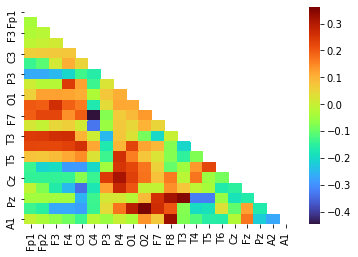

In [53]:
import seaborn as sns
import pandas as pd
import numpy as np
np.random.seed(0)
df = pd.DataFrame(ggg,index=['Fp1','Fp2','F3','F4','C3','C4','P3',
                             'P4','O1','O2','F7','F8','T3','T4','T5','T6','Cz','Fz','Pz','A2','A1']
                  ,columns=['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','T3','T4','T5',
                               'T6','Cz','Fz','Pz','A2','A1'],  )
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df, mask=mask, square=False,cmap="turbo")

In [51]:
gg.shape

(6, 21, 21)

In [52]:
ggg=gg[1,:,:]